<div style="background-color: black; color: white; padding: 10px;text-align: center;">
  <strong>Date Published:</strong> June 24, 2025 <strong>Author:</strong> Adnan Alaref
</div>

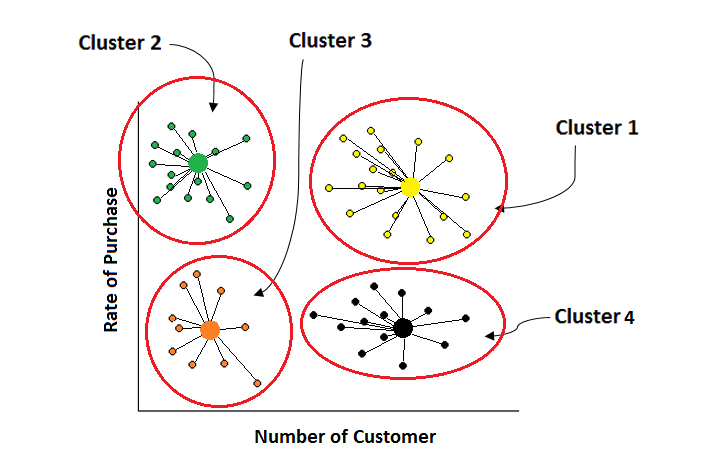

# **◍ Step 1: Introduction.**

## **🔹 What is K-Means?**
K-Means is an **unsupervised learning** algorithm used to **partition data into `k` distinct clusters** based on similarity.

---

## **🔹 How It Works (Step-by-Step):**

1. Choose the number of clusters (`k`) you want to find.  
2. Initialize `k` centroids randomly.  
3. Assign each data point to the nearest centroid (using distance, usually Euclidean).  
4. Update each centroid to be the mean of the points assigned to it.  
5. Repeat steps 3 and 4 until convergence (centroids don't change or max iterations reached).

---

## **🔹 Visualization (Intuition):**

Imagine spreading dots on a 2D plane:

- K-Means tries to **group nearby dots into `k` groups**, with a central point (centroid) representing each group.
- It does so by **minimizing the total within-cluster sum of squares (WCSS)**.

---

## **🔹 Objective Function:**

K-Means minimizes the following objective:

$$
J = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2
$$

Where:
- \( C_i \) is the set of points in cluster \( i \)
- \( μ_i \) is the centroid of cluster \( i \)

---

## **🔹 How do you evaluate KMeans:**
* Inertia (Within-Cluster Sum Square)
  - Measures how tightly grouped the clusters are.
  - Lower is better (but beware of overfitting).
  - **Formula:**
  $$
J = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2
$$


* Silhouette Score.
  - Ranges from -1 to 1.
  - Higher is better. Shows how well each point fits into its cluster.
  - **Formula:**
  $$
s(x) = \frac{b(x) - a(x)}{\max(a(x), b(x))}
$$

* Davies–Bouldin Index
  - Lower is better.
  - Measures average similarity between each cluster and its most similar one.
  - **Formula:**
  $$
\text{DBI} = \frac{1}{k} \sum_{i=1}^{k} \max_{j \ne i} \left( \frac{\sigma_i + \sigma_j}{d(\mu_i, \mu_j)} \right)
$$

* Calinski–Harabasz Index
  - Higher is better.
  - Ratio of between-cluster dispersion and within-cluster dispersion.
  - **Formula:**
  $$
\text{CH} = \frac{\text{Tr}(B_k)}{\text{Tr}(W_k)} \cdot \frac{n - k}{k - 1}
$$

---

## **🔹 When to Use K-Means:**

✅ Large datasets  
✅ You want quick, interpretable clustering  
✅ Data has spherical, equally sized clusters

---

## **🔹 Limitations:**

❌ Must predefine `k`  
❌ Sensitive to initial centroids  
❌ Struggles with non-spherical or unequal-density clusters  
❌ Not ideal for categorical data

---

# **◍ Step 2: How do you choose number of k in kmans?**
>Choosing the number of clusters (k) in K-Means is a critical step, and there’s no perfect answer — but here are the most common data-driven techniques:


## ✅ 1. Elbow Method
Idea: Plot the Within-Cluster Sum of Squares (WCSS) against different values of k and look for an "elbow" — a __point where the decrease in WCSS slows down__.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

import warnings
warnings.filterwarnings(action='ignore')
warnings.simplefilter(action='ignore' ,category=FutureWarning)

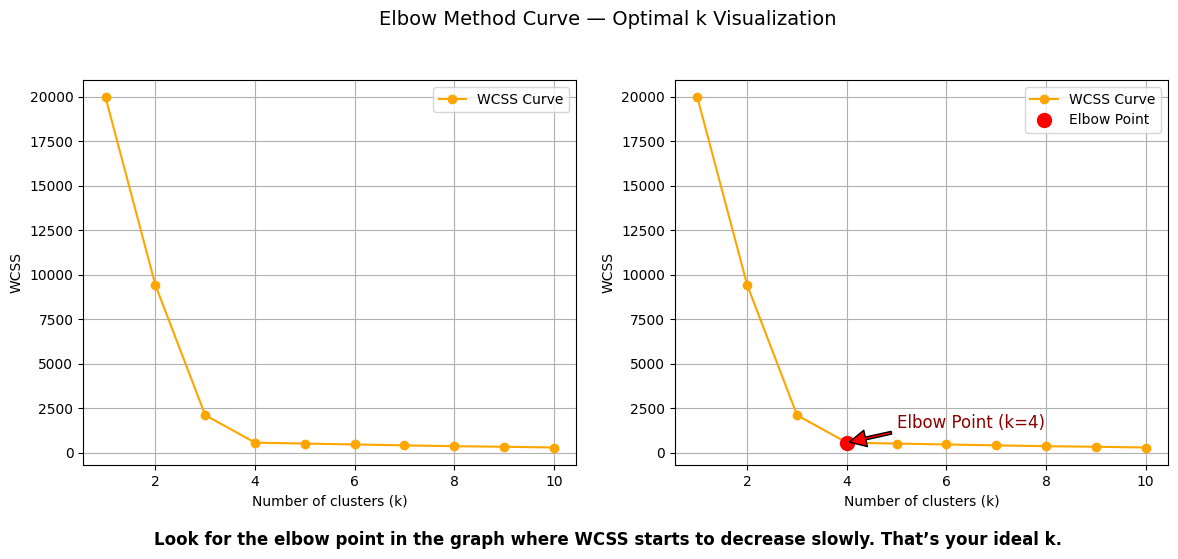

In [ ]:
# Step 1: Generate synthetic data
data, _ = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=1.0, random_state=42)

# Step 2: Compute WCSS for range of k
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
  wcss.append(kmeans.inertia_) # inertia = wcss

# Step 3: Plot Elbow Curve
fig ,ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Add a super title for the whole figure
fig.suptitle("Elbow Method Curve — Optimal k Visualization", fontsize=14, y=1.02)

ax[0].plot(range(1,11), wcss, color = 'orange', marker='o', label='WCSS Curve')
ax[0].set_xlabel('Number of clusters (k)')
ax[0].set_ylabel('WCSS')
ax[0].grid(True)
ax[0].legend()

# Step 4: Highlight the elbow point
optimal_k = 4
elbow_x = optimal_k
elbow_y = wcss[optimal_k - 1]

ax[1].plot(range(1,11), wcss, color = 'orange', marker='o', label='WCSS Curve')
# Add a red dot at the elbow
ax[1].plot(elbow_x, elbow_y, 'ro', markersize=10 ,label='Elbow Point')
ax[1].annotate('Elbow Point (k=4)',
               xy=(elbow_x, elbow_y),
               xytext=(optimal_k+1, wcss[optimal_k-1] * 2.5),
               arrowprops = dict(facecolor='red', shrink=0.05, width=2),
               fontsize=12, color='darkred')
ax[1].set_xlabel('Number of clusters (k)')
ax[1].set_ylabel('WCSS')
ax[1].grid(True)
ax[1].legend()


plt.figtext(0.5, -0.05, 'Look for the elbow point in the graph where WCSS starts to decrease slowly. That’s your ideal k.',
            wrap=True, horizontalalignment='center', fontsize=12 ,fontweight = 'bold')
plt.show()

### **👉 Best k to choose:**
  * Looking at your chart, the “elbow” — where the WCSS curve sharply drops and then starts to flatten — occurs at k= 4:

  * This is the point where increasing the number of clusters further gives diminishing returns (the WCSS doesn't improve much).

## **✅ 2. Silhouette Score**
Idea: Measures how similar each point is to its own cluster vs other clusters. Score ranges from -1 to 1 (higher is better).

In [ ]:
# Silouette_score
scores = {}
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(data)

  # Compute Silouette score
  score = silhouette_score(data, kmeans.labels_)
  scores[k] = score
  print(f'K = {k} ,Score = {score:.4f}')  # Choose k with higest score

# Get best k with higset score
best_k = max(scores, key=scores.get)
print(f"\nThe Best K For Number Of Clusters = {best_k} ,With Score = {scores[best_k]:.4f}")

K = 2 ,Score = 0.5902
K = 3 ,Score = 0.7569
K = 4 ,Score = 0.7916
K = 5 ,Score = 0.6642
K = 6 ,Score = 0.5330
K = 7 ,Score = 0.4263
K = 8 ,Score = 0.3352
K = 9 ,Score = 0.3454
K = 10 ,Score = 0.3617

The Best K For Number Of Clusters = 4 ,With Score = 0.7916


### 👉 Interpretation

| **Silhouette Score** | **Meaning** |
|----------------------|-------------|
| **+1 (near +1)**     | ✅ Point is well-matched to its own cluster and far from others — very good clustering. |
| **0 (near 0)**       | ⚠️ Point is on the boundary between two clusters — could go either way. |
| **-1 (below 0)**     | ❌ Point is closer to a different cluster than its own — likely misclassified. |

> ## **🔁 In Practice : You can combine Elbow + Silhouette for better confidence.**

## **Davies–Bouldin Index**

In [ ]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(X, kmeans.labels_)
print(db_index)

## **Calinski–Harabasz Index**

In [ ]:
from sklearn.metrics import calinski_harabasz_score
ch_index = calinski_harabasz_score(X, kmeans.labels_)
print(ch_index)

# **◍ Step 3: KMeans In Sklearn .**

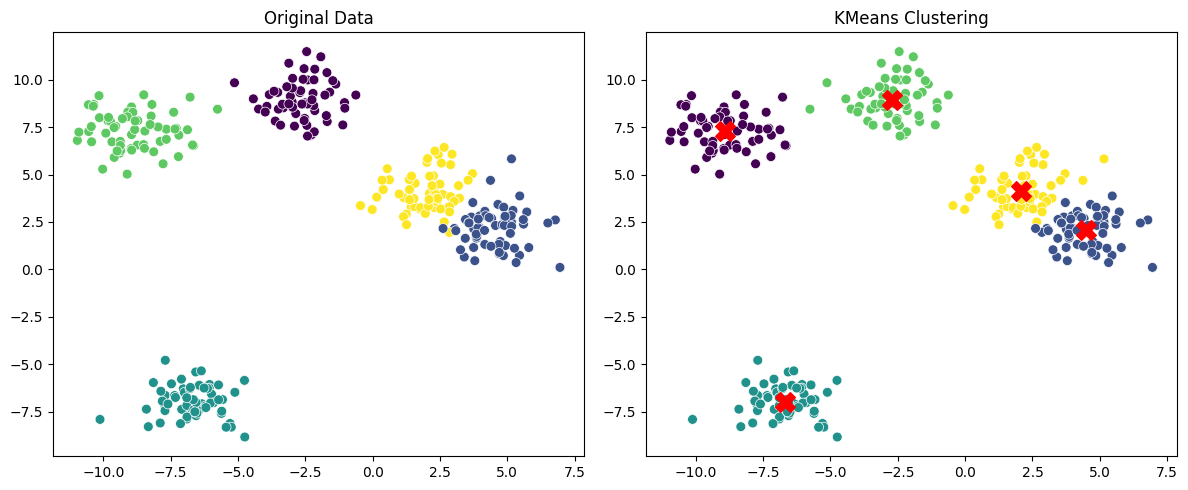

In [ ]:
# Generate isotropic Gaussian blobs for clustering
data_, true_labels = make_blobs(n_samples=300, centers=5, random_state=42, cluster_std=1.0)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_)
predicted_labels = kmeans.labels_


# Visualize
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Original Data
ax[0].scatter(data_[:, 0], data_[:, 1], c=true_labels,
              s=50, cmap='viridis', marker='o', edgecolors='w', linewidth=0.5)
ax[0].set_title('Original Data')

# KMeans Clustering
ax[1].scatter(data_[:, 0], data_[:, 1], c=predicted_labels,
              s=50, cmap='viridis', marker='o', edgecolors='w', linewidth=0.5)

centers = kmeans.cluster_centers_
ax[1].scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X')
ax[1].set_title('KMeans Clustering')

plt.tight_layout()
plt.show()

# **◍ Step 4: Lets's Create Our Custom Implemintation For KMeans.**

In [ ]:
class KMansCustom:
  def __init__(self, k = 3, max_iter = 100):
    self.k = k
    self.max_iter = max_iter
    # dict of indices [0-K-1]: for each cluster idx: list of its points
    self.clusters = {}
    # List of indices [0-K-1]: for each cluster idx: D-dimensional vector for centroid
    self.centroids = []


  # Step 1: Initilization
  def KMeans_Initilization(self, data):
    # Select Random K Data Points
    # Initialize centroids with actual data points
    random_indices = np.random.choice(data.shape[0], self.k, replace=False)
    self.centroids = data[random_indices]


  # Define distance function
  def _dist(self, point, centroids):
    # return np.linalg.norm(point-centroids) has sqrt Extra calculations, nothing more √10 vs √7  == 10 vs 7
    return np.sum((point - centroids)**2)


  # Step 2: Assigen
  def assign_cluster(self, data):
    self.clusters = {i : [] for i in range(self.k)}
    for point in data:
      distances = [self._dist(point, centroid) for centroid in self.centroids]
      cluster_idx = np.argmin(distances)
      self.clusters[cluster_idx].append(point) # Add cluster point


  # Step 3: Update
  def update_centroids(self):
    for cluster_idx, cluster_points in self.clusters.items():
       # Average points of each cluster. axis=0 ==> vertically
       if cluster_points:
        self.centroids[cluster_idx] = np.mean(cluster_points ,axis = 0)


  # Step 4: Repate
  def fit_kmeans(self, data):
    self.KMeans_Initilization(data)

    for _ in range(self.max_iter):
      self.assign_cluster(data)
      prev_centroids = np.copy(self.centroids)
      self.update_centroids()

      # Check for convergence
      if np.allclose(self.centroids, prev_centroids, rtol=1e-4):
        break


  def predict_kmeans(self, data):
    predictions = []
    for point in data:
      distances_ = [self._dist(point ,center) for center in self.centroids]
      cluster_idx = np.argmin(distances_)
      predictions.append(cluster_idx)
    return predictions

# **◍ Step 5: Evaluation Custom Code.**

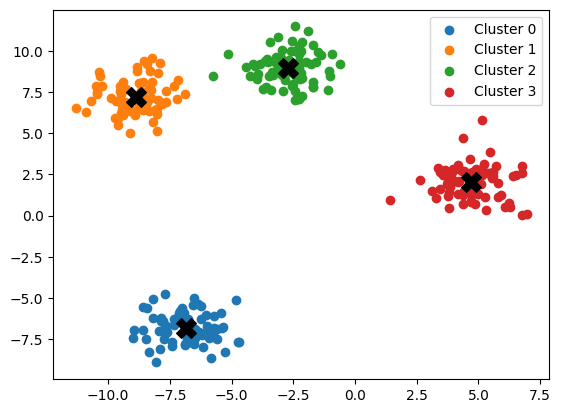

In [ ]:
# Cheack code
data_custom, _ = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=1.0, random_state=42)

kmeans_custom = KMansCustom(k=4)
kmeans_custom.fit_kmeans(data_custom)

# Assign clusters
predicted_lables = kmeans_custom.predict_kmeans(data_custom)

# Visualize clusters
for i in range(kmeans_custom.k):
    plt.scatter(np.array(kmeans_custom.clusters[i])[:, 0], np.array(kmeans_custom.clusters[i])[:, 1], label=f'Cluster {i}')
    plt.scatter(kmeans_custom.centroids  [i][0], kmeans_custom.centroids[i][1], s=200, marker='X', color='black')  # centroid

plt.legend()
plt.show()

<a id="Import"></a>
<p style="background-color: #000000; font-family: 'Verdana', sans-serif; color: #FFFFFF; font-size: 160%; text-align: center; border-radius: 25px; padding: 12px 20px; margin-top: 20px; border: 2px solid transparent; background-image: linear-gradient(black, black), linear-gradient(45deg, #FF00FF, #00FFFF, #FFFF00, #FF4500); background-origin: border-box; background-clip: content-box, border-box; box-shadow: 0px 4px 20px rgba(255, 105, 180, 0.8);">
   Thanks & Upvote ❤️</p>